# 21회 모의고사

## 머신 러닝 (50점)
데이터 : 학생 성적에 관한 데이터세트 제공 394행짜리 소규모 데이터.

1-1. 시각화 포함 탐색적 자료분석을 시행하시오. (EDA) <br>
1-2. 결측치 식별하고 결측치를 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명하시오.<br>
1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명하시오.<br>
1.4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명하시오.<br>
1.5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 학생성적 예측 분석에 적합한 알고리즘인지 설명하시오.<br>
1.6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명하고, <br>
현업에서 사용시 주의할 점 등에 대해 기술하시오.<br>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../data/student_data.csv")
df.head(3)

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8


In [2]:
nom_cols=[]
num_cols=[] 
for col in df.columns:
    if df[col].dtype == 'object':
        nom_cols.append(col)
    elif df[col].dtype == 'float64' or df[col].dtype == 'int64':
        num_cols.append(col)

In [3]:
print(f'{nom_cols}는 수치형 변수이다.')
for col in nom_cols:
    print(df[col].value_counts())

print('모두 2항 범주형 변수이다.')

['school', 'sex', 'paid', 'activities']는 수치형 변수이다.
school
GP    349
MS     46
Name: count, dtype: int64
sex
F    208
M    187
Name: count, dtype: int64
paid
no     214
yes    181
Name: count, dtype: int64
activities
yes    201
no     194
Name: count, dtype: int64
모두 2항 범주형 변수이다.


In [4]:
print(f'{num_cols}는 수치형 변수이다.')
for col in num_cols:
    print(df[col].value_counts())

print('''그 중에서도 
      [famrel, freetime, goout, Dalc, Walc, health]는 5점 스케일의 서열척도이고,
      [absences, grade, G1, G2]는 정수 형식의 수치형변수이다.''')

['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'grade', 'G1', 'G2']는 수치형 변수이다.
famrel
4.0    194
5.0    106
3.0     68
2.0     18
1.0      8
Name: count, dtype: int64
freetime
3.0    157
4.0    114
2.0     64
5.0     40
1.0     18
Name: count, dtype: int64
goout
3.0    128
2.0    103
4.0     86
5.0     53
1.0     22
Name: count, dtype: int64
Dalc
1.0    274
2.0     75
3.0     25
4.0      9
5.0      8
Name: count, dtype: int64
Walc
1.0    151
2.0     85
3.0     79
4.0     50
5.0     28
Name: count, dtype: int64
health
5.0    145
3.0     90
4.0     66
1.0     46
2.0     44
Name: count, dtype: int64
absences
0.0     115
2.0      65
4.0      52
6.0      31
8.0      22
10.0     16
14.0     12
12.0     12
3.0       8
7.0       7
16.0      6
5.0       5
18.0      5
20.0      4
11.0      3
9.0       3
13.0      3
15.0      3
22.0      3
1.0       3
38.0      1
30.0      1
40.0      1
23.0      1
19.0      1
28.0      1
75.0      1
21.0      1
24.0      1
56.0      1
26.0

## 1-1. 시각화 포함 탐색적 자료분석(EDA)

DataFrame.info() 함수를 통해 데이터 타입 및 결측치 확인

In [5]:
nul_df = df.isnull().sum()
nul_df = nul_df[nul_df > 0]
nul_cols = nul_df.index.tolist()

print(f'결측치를 갖는 열과 결측치 수는 아래와 같다.')
print(nul_df)

결측치를 갖는 열과 결측치 수는 아래와 같다.
famrel      1
freetime    2
goout       3
Dalc        4
Walc        2
health      4
absences    3
dtype: int64


famrel, freetime, Dalc, absences는 극단값들을 갖는 것으로 보인다.


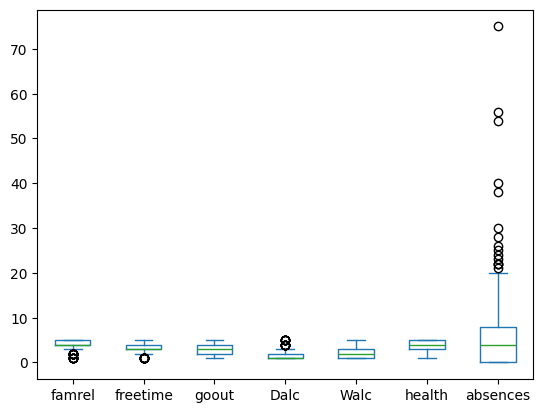

In [6]:
df[nul_cols].plot(kind='box')
print('famrel, freetime, Dalc, absences는 극단값들을 갖는 것으로 보인다.')

In [7]:
outlier_cols = ['famrel', 'freetime', 'Dalc', 'absences']

for col in outlier_cols:
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    UTV = df[col].quantile(0.75) + 1.5*IQR
    LTV = df[col].quantile(0.25) - 1.5*IQR
    outlier_count = df[(df[col] > UTV) | (df[col] < LTV)].shape[0]
    print(f'{col} has {outlier_count} outliers')

famrel has 26 outliers
freetime has 18 outliers
Dalc has 17 outliers
absences has 15 outliers


## 종속변수 분포 확인

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        17.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 19.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., 29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

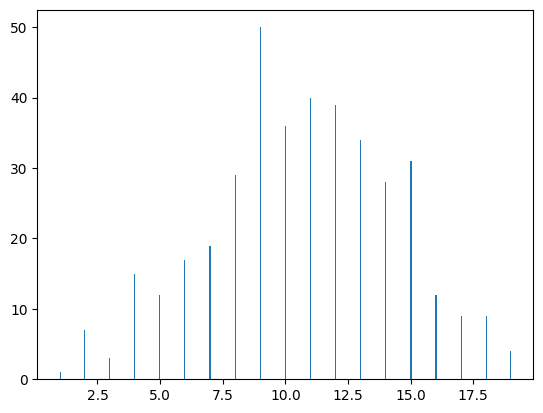

In [8]:
plt.hist(x='grade', data=df, bins=df.value_counts().shape[0], range=(df.grade.min(), df.grade.max()))

c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

 종속변수인 grade는 1~19의 서열척도이며 정규분포에 가까운 분포를 보이고 있다. 이런 경우는 분류모델이 아닌 회귀모델을 적용하는 방법도 가능하다.
      특히 G1, G2 독립변수와 뚜렷한 비례관계를 보이고 있어 회귀모델을 적용하는 방법이 유용할 수 있다.
      단, 이 때 G1, G2의 다중공선성 문제를 유의해야 하며, 이항변수인 ['school', 'sex', 'paid', 'activities']의 경우는 0/1로 encoding필요하다.



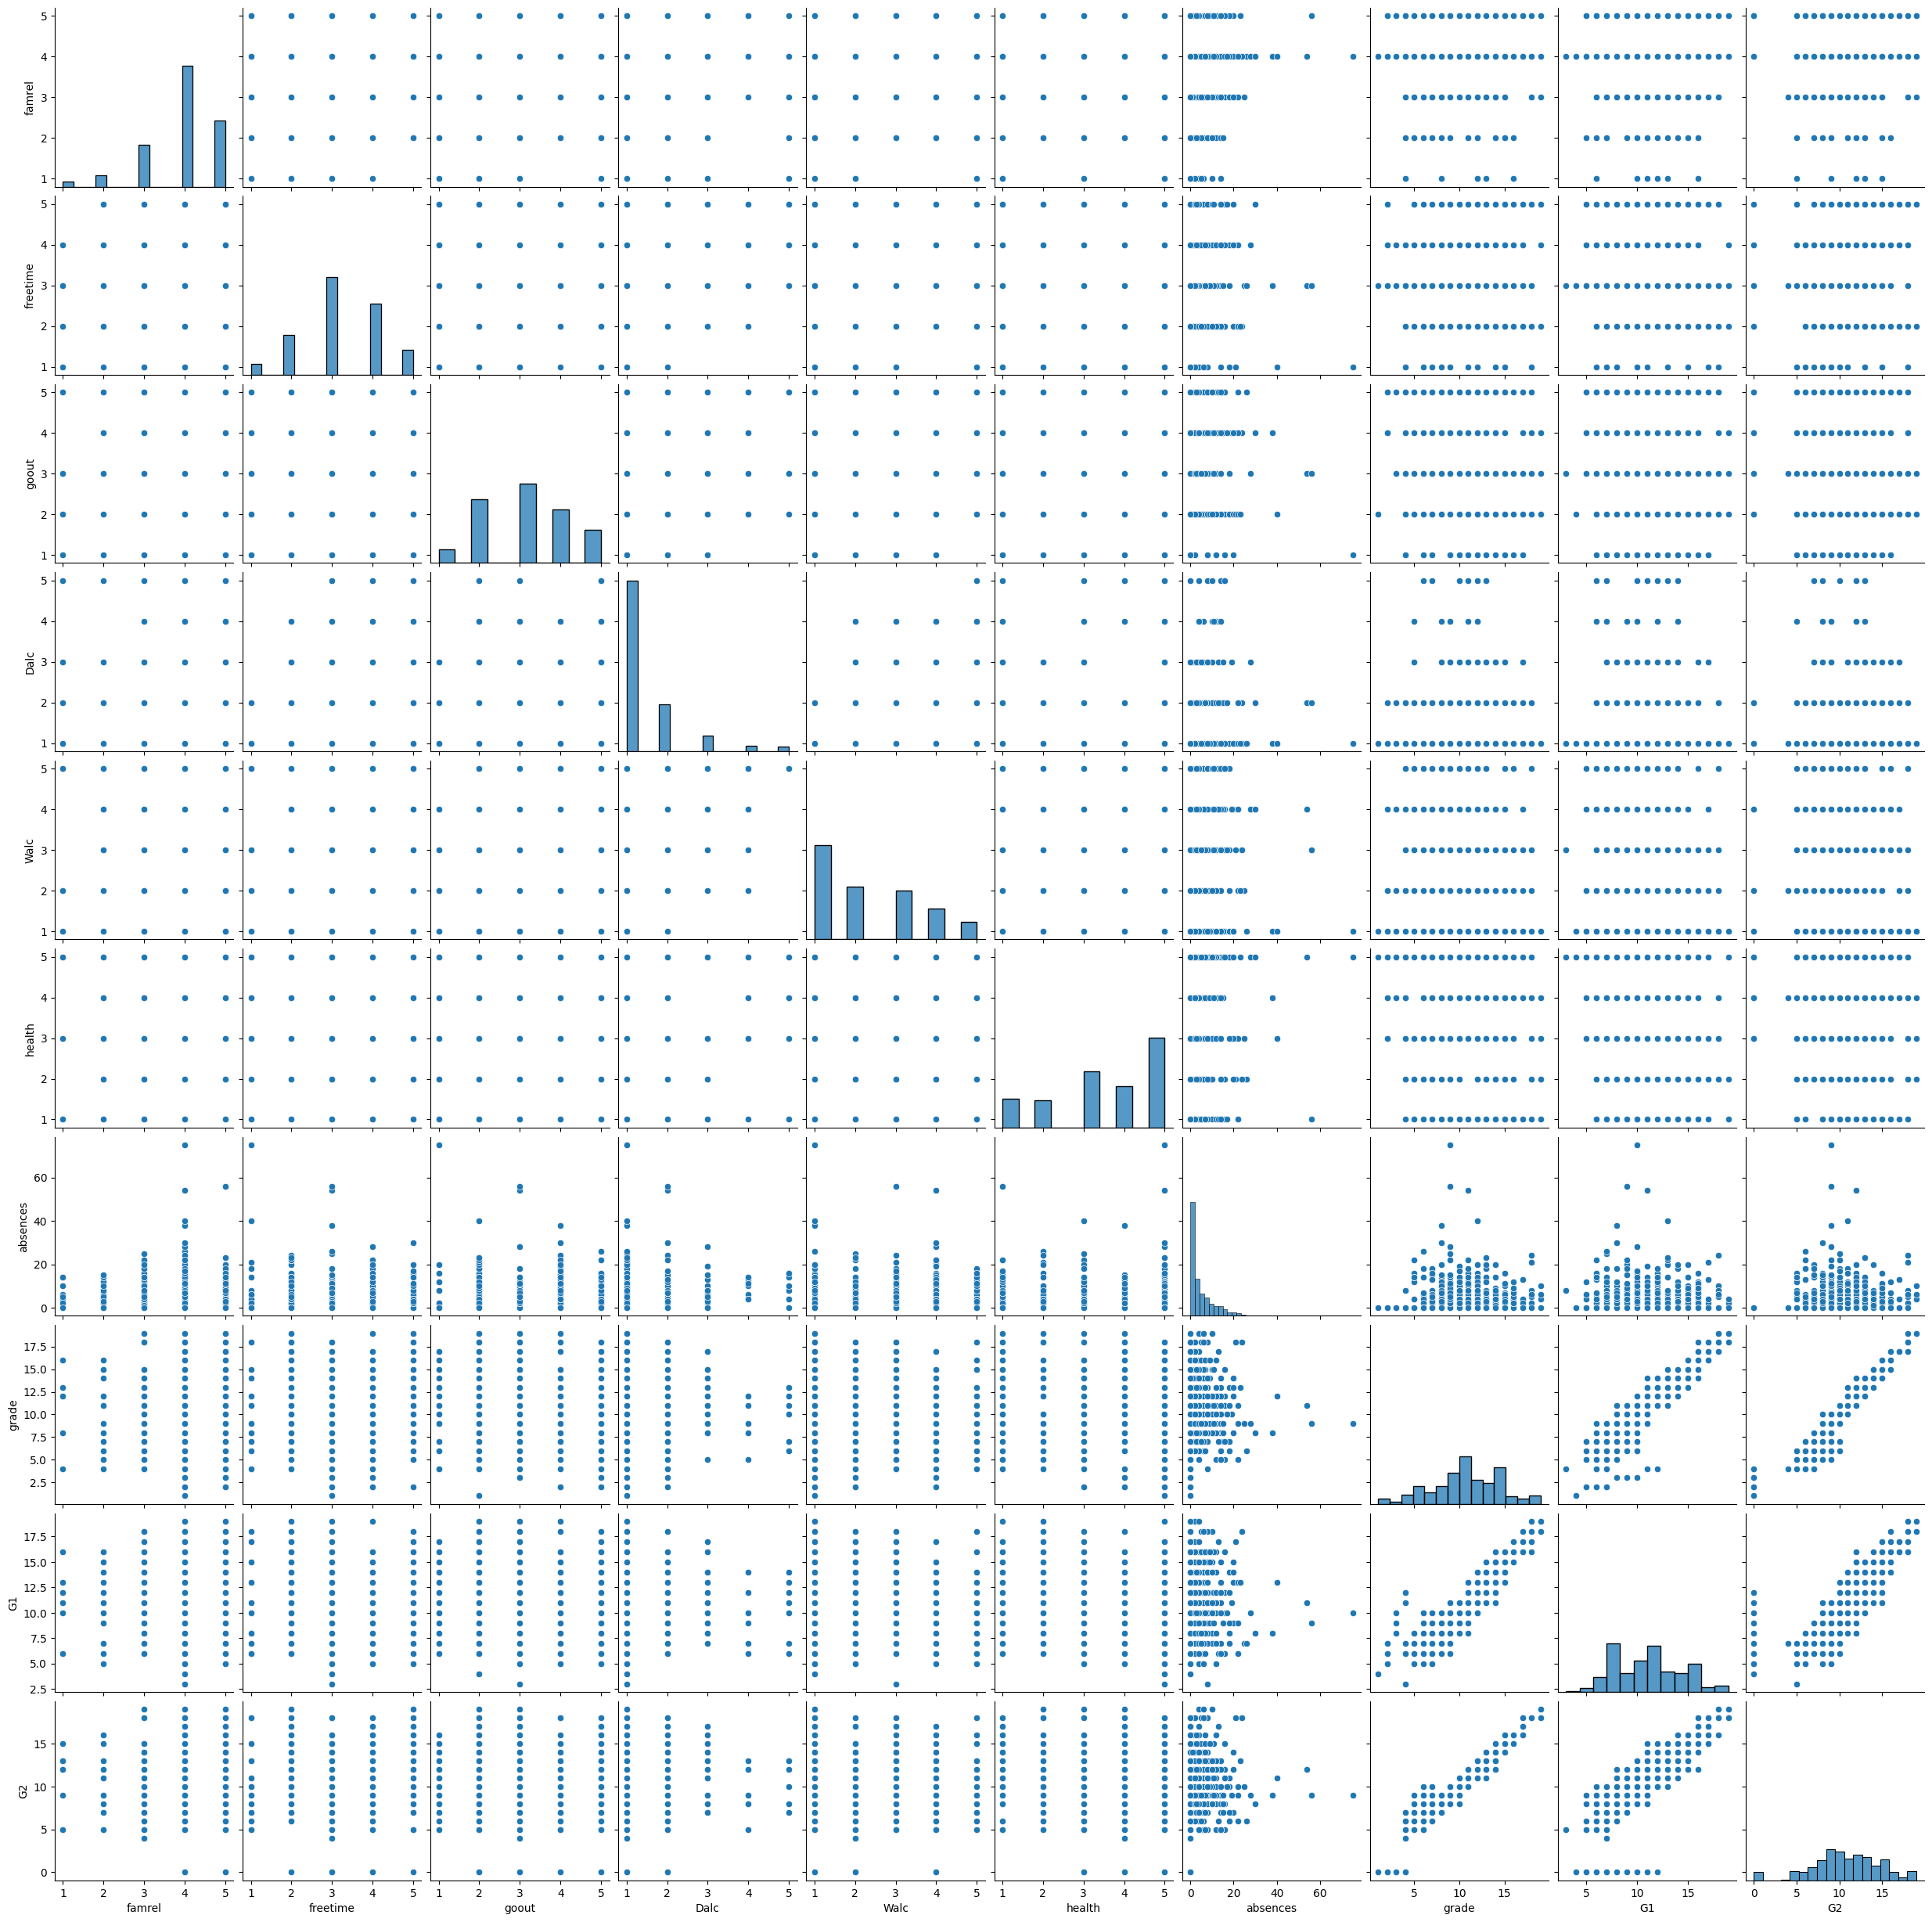

In [9]:
sns.pairplot(data=df)

print(''' 종속변수인 grade는 1~19의 서열척도이며 정규분포에 가까운 분포를 보이고 있다. 이런 경우는 분류모델이 아닌 회귀모델을 적용하는 방법도 가능하다.
      특히 G1, G2 독립변수와 뚜렷한 비례관계를 보이고 있어 회귀모델을 적용하는 방법이 유용할 수 있다.
      단, 이 때 G1, G2의 다중공선성 문제를 유의해야 하며, 이항변수인 ['school', 'sex', 'paid', 'activities']의 경우는 0/1로 encoding필요하다.
''')

       feature        VIF
0       school   1.184950
1          sex   2.391093
2         paid   1.978973
3   activities   2.105990
4       famrel  15.877808
5     freetime  13.369856
6        goout  11.265138
7         Dalc   6.961921
8         Walc   8.608723
9       health   7.143219
10    absences   1.547913
11          G1  43.230438
12          G2  34.901632
 
    G1과 G2는 vif 수치가 43, 34로 매우 높은 것으로 나타났다.



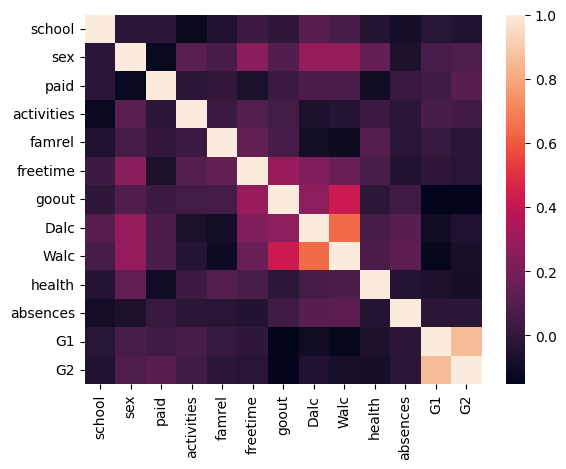

In [10]:
# 다중공선성 문제 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor

data = df.drop('grade', axis=1)

data.school = data.school.map({'GP':0, 'MS':1},)
data.sex = data.sex.map({'F':0, 'M':1})
data.paid = data.paid.map({'no':0, 'yes':1})
data.activities = data.activities.map({'no':0, 'yes':1})

X = data.dropna()

vif_df = pd.DataFrame(columns=['feature', 'VIF'])

vif_df.feature = X.columns
vif_df.VIF = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df)

sns.heatmap(X.corr())

print(''' 
    G1과 G2는 vif 수치가 43, 34로 매우 높은 것으로 나타났다.
''')

종속변수 학생 성적에 대한 분포를 확인한 결과 평균 근처에 관측치가 많은 정규분포 형태를 띄었다. 
Shapriro test 결과도 p-value가 0.05이하로 정규성을 띄고 있음을 확인할 수 있었다. 

또한 해당 종속변수의 값이 정규성을 띄고 다양한 값이 있으므로 다중 classification으로 예측하는 것보다는 회귀분석을 진행하는 것이 좋아보인다. 

## 독립변수 EDA 

## 범주형 변수 시각화 

변수 해석 6가지 
 
1. 결측치 존재 여부 
- 전체 데이터에서 famrel, goout, Dalc, Walc, absences의 변수에서 결측치가 존재한다. 
- 결측치의 개수는 전체 1% 채 되지 않는 19개이다. 
- 결측치가 존재하는 변수들은 flat64형태로 평균으로 대체하거나 KNN을 사용할 수 있을 것으로 보인다. 

2. 데이터 타입 설명 
- 종속변수는 int형, 독립변수는 object와 float형태로 구성되어 있다. object타입은 인코딩을 통하여 변환해줄 필요가 있어보인다. 

3. 종속변수 분포 설명 
- 종속변수의 분포는 정규분포를 띈다. (위에서 설명함) 

4. 종속변수와 독립변수의 상관관계 설명 
- 종속변수 grade와의 상관계수를 확인해 보았을 때, 수치형 변수에서는 큰 상관성이 없었다. 파생변수를 활용할 필요가 있어보인다. 

5. 독립변수 상관관계 설명 
- 독립변수끼리의 상관관계를 확인해본 결과 다중공선성을 걱정할 만큼(0.9이상) 독립변수끼리의 상관성이 큰 변수는 보이지 않았다. 
- 하지만 G1과 G2의 관계는 서로 높으므로 주의할 필요가 있다. 

6. 유의할 점 (pandas_profiling의 warrning 값 설명) 
- 독립변수 중 school의 경우 비대칭성이 있으므로 주의하여야한다. 

## 1-2. 결측치 식별하고 결측치를 예측하는 두 가지 방법 정도를 쓰고, 선택한 이유를 설명하시오.


In [11]:
# NA 데이터를 포함하고 있는 데이터만 반환한다.
nul_data = data[data.isna().any(axis=1)]

nul_df = data.isnull().sum()
nul_col = nul_df[nul_df > 0]
print(nul_col)

print(''' 
결측치를 대치하는 방법으로 아래와 같은 방법들을 고려할 수 있다.
      - 평균값으로 대치하는 방법 
      - 클러스터링을 통해 유사한 특성 집합을 갖는 데이터를 찾아내어, 해당 데이터의 값으로 대치하는 방법, 
      - 결측치를 갖는 특성을 목적변수로 하여 회귀분석을 함으로써 대치할 값을 예측하는 방법

이 데이터의 경우 성적을 목적변수로 가지며, 다른 특성들은 설명변수로서 성적을 예측하기 위한 근거의 역할을 하게 된다.
      따라서 유사한 성적을 갖는 데이터는 유사한 특성을 갖게 될 것으로 에측할 수 있고,
      이에 따라 클러스터링을 통해 값을 예측하는 것이 유효한 전략이 될 수 있을 것으로 판단한다.
''')

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
fitted = imputer.fit_transform(data)

data = pd.DataFrame(fitted,  columns=data.columns)
data.isnull().sum()

famrel      1
freetime    2
goout       3
Dalc        4
Walc        2
health      4
absences    3
dtype: int64
 
결측치를 대치하는 방법으로 아래와 같은 방법들을 고려할 수 있다.
      - 평균값으로 대치하는 방법 
      - 클러스터링을 통해 유사한 특성 집합을 갖는 데이터를 찾아내어, 해당 데이터의 값으로 대치하는 방법, 
      - 결측치를 갖는 특성을 목적변수로 하여 회귀분석을 함으로써 대치할 값을 예측하는 방법

이 데이터의 경우 성적을 목적변수로 가지며, 다른 특성들은 설명변수로서 성적을 예측하기 위한 근거의 역할을 하게 된다.
      따라서 유사한 성적을 갖는 데이터는 유사한 특성을 갖게 될 것으로 에측할 수 있고,
      이에 따라 클러스터링을 통해 값을 예측하는 것이 유효한 전략이 될 수 있을 것으로 판단한다.



school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
dtype: int64



1) 단순 대치법 : 수치형 변수라면, 각 컬럼의 평균이나 중앙값을 사용하여 결측치를 보간할 수 있으며, 
                 명목형, 범주형 변수라면 최빈값을 사용하여 대치할 수 있습니다. 
                 
2) KNN을 이용한 결측치 대체 : 보간법 중 결측치가 없는 컬럼들의 최근접 이웃 알고리즘을 통해 결측치가 있는 변수 대체를 할 수 있습니다. 
* 단, KNN을 이용할 때에는 거리 계산이 가능한 수치형 변수만 사용 가능 

- 해당 데이터에서는 한 행이 전부 결측치인 경우는 존재하지 않으므로 삭제보다는 대체하는 것이 좋아보인다. 수치형 변수만 결측치가 있으므로 KNN기법을 사용하여 대체하겠다. 




## 1-3. 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. 선택한 이유를 설명.


1) 이산형 변수 : school , sex ,paid,  activities 이 존재, 이산형 변수이므로 boolean 타입으로 변경하여 KNN을 이용한 결측치 처리와 머신러닝에서 변수사용가능하도록 변환하였다. <br>
2) 나머지 변수들은 수치 or 순위형 변수로 판단되므로 원핫인코딩을 하지 않았다. 

In [ ]:
nom_cols=[]
num_cols=[] 
for col in df.columns:
    if df[col].dtype == 'object':
        nom_cols.append(col)
    elif df[col].dtype == 'float64' or df[col].dtype == 'int64':
        num_cols.append(col)

print(num_cols)
print(nom_cols)



## 1.4. 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용. 선택한 이유 설명.

1) 랜덤 분할 
 - train test데이터셋을 나누어서 학습된 데이터를 검증할 수 있음 
 - 분할 시에 무작위로 사용자가 지정하여 비율로 분할 함 
 - 전체 분석 데이터 중 머신러닝 모델을 학습시키기 위한 학습용 데이터와 테스트 데이터를 나누어서 적용시키는 이유는 
   모델 결과가 다른 데이터에도 적용 가능한지, 일반화가 가능한지를 검증하기 위함이다. 
 
2) 층화 추출 기법 
- 종속변수의 클래스의 비율이 학습용 데이터와 테스트용 데이터에 비율이 같게 분할함 
- 클래스의 편향을 막을 수 있음 
- 종속변수가 범주형 변수인 분류분석에 사용 



해당 데이터는 종속변수가 연속형이므로, 회귀분석을 사용한다. 그러므로 층화추출기법을 사용한 분할이 아닌 랜덤 샘플링을 통한 분할을 사용하여, 7:3 비율로 분할하였다. 



In [12]:
print(''' 
단순랜덤 추출법
      - 단순히 랜덤하게 학습데이터와 검증데이터를 나누는 방식이다.
      - 이 경우의 문제는, 학습 시 특정 클래스의 데이터가 더 적거나 많게 추출될 수 있다는 점이다.
      - 이로 인해, 특정 클래스에만 과적합되는 편향이 발생할 수 있다.

집락 혹은 층화 추출법
      - 10대, 20대 등 각 연령대 별로 동일한 샘플을 추출하는 방식을 의미한다.
      - 이 데이터의 사례에서는 목적변수인 grade의 값이 1~19까지 나눠져 있기 때문에, 
      - 학습용 데이터와 검증용 데이터 모두 1~19의 grade를 고르게 포함하도록 샘플링하는 것이 모델 일반화에 중요하다.

이 데이터의 목적변수는 1~19의 클래스를 가지는데, 클래스 1의 경우 1개의 데이터 밖에 없다. 
      이를 학습용데이터와 검증용데이터로 분리 시 클래스 1의 데이터가 학습용, 검증용에 각각 1개씩 들어가도록 복제한다.
''')

data1 = data.copy()

from sklearn.model_selection import train_test_split

y = df.grade
X = data1

index_1 = df.grade[df.grade==1].index
X = pd.concat([X, X.iloc[index_1, :].copy()], axis=0)
y[y.size] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11, stratify=y)


 
단순랜덤 추출법
      - 단순히 랜덤하게 학습데이터와 검증데이터를 나누는 방식이다.
      - 이 경우의 문제는, 학습 시 특정 클래스의 데이터가 더 적거나 많게 추출될 수 있다는 점이다.
      - 이로 인해, 특정 클래스에만 과적합되는 편향이 발생할 수 있다.

집락 혹은 층화 추출법
      - 10대, 20대 등 각 연령대 별로 동일한 샘플을 추출하는 방식을 의미한다.
      - 이 데이터의 사례에서는 목적변수인 grade의 값이 1~19까지 나눠져 있기 때문에, 
      - 학습용 데이터와 검증용 데이터 모두 1~19의 grade를 고르게 포함하도록 샘플링하는 것이 모델 일반화에 중요하다.

이 데이터의 목적변수는 1~19의 클래스를 가지는데, 클래스 1의 경우 1개의 데이터 밖에 없다. 
      이를 학습용데이터와 검증용데이터로 분리 시 클래스 1의 데이터가 학습용, 검증용에 각각 1개씩 들어가도록 복제한다.



C:\Users\lsel\AppData\Local\Temp\ipykernel_2720\2034435515.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y.size] = 1


## 1.5. svm, xgboost, randomforest 3개의 알고리즘 공통점을 쓰고 이 예측 분석에 적합한 알고리즘인지 설명.

* 회귀분석과 분류분석을 모두 할 수 있는 분석알고리즘이다. 
* 모두 범주형 변수를 독립변수로 사용할 수 없어 변환을 해주어야 한다. 
* 과대 적합 과소적합을 막기위한 매개변수의 설정이 필요하다.

* 해당 데이터에서는 종속변수의 값이 연속형이므로 회귀분석이 적합하다. 

In [13]:
print(''' 
svm, xgboost, randomforest는 회귀, 분류에 모두 사용할 수 있는 알고리즘이다.
      세 모델 모두 명목척도에 대해 처리가 불가하므로, 수치형 데이터로 변형해야 한다.
      세 모델 모두 파라미터 최적화를 통해 과대적합과 과소적합을 방지하고 성능을 향상시킬 수 있다.
      목표변수가 1~19의 정수값으로 multi-class 분류로 볼 수도 있겠으나, 
      grade(성적)라는 성적을 고려할 때 서열척도 해당하고, grade 데이터의 분포가 정규성을 띠고 있어,
      회귀모델 적용이 적절할 것으로 판단된다.
''')

 
svm, xgboost, randomforest는 회귀, 분류에 모두 사용할 수 있는 알고리즘이다.
      세 모델 모두 명목척도에 대해 처리가 불가하므로, 수치형 데이터로 변형해야 한다.
      세 모델 모두 파라미터 최적화를 통해 과대적합과 과소적합을 방지하고 성능을 향상시킬 수 있다.
      목표변수가 1~19의 정수값으로 multi-class 분류로 볼 수도 있겠으나, 
      grade(성적)라는 성적을 고려할 때 서열척도 해당하고, grade 데이터의 분포가 정규성을 띠고 있어,
      회귀모델 적용이 적절할 것으로 판단된다.



## 1.6. 세 가지 모델 모두 모델링 해보고 가장 적합한 알고리즘 선택하고 이유 설명. 한계점 설명하고 보완 가능한 부분 설명.
현업에서 사용시 주의할 점 등에 대해 기술.

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV

fold_svm = StratifiedKFold(n_splits=4)
model_svm = SVC()
grid_svm = { 'degree': [1, 2, 3],                   # 'poly' 커널에서 차수 조절
             'C': [0.1, 0.3, 0.7, 1],                     # 에러율 조절 (커지면 과적합)
             'gamma': [0.1, 0.3, 0.5, 1],                 # 학습정도 조절 (커지면 과적합)
             'kernel': ['linear', 'rbf', 'poly']}   # 경계면의 곡선화   

#gcv_svm = GridSearchCV(model_svm, param_grid=grid_svm, cv=fold_svm)
#gcv_svm.fit(X, y)
#print(f'SVM\'s best_score {gcv_svm.best_score_}')
#print(f'SVM\'s best_param {gcv_svm.best_params_}')

model_svm = SVC(C=0.3, degree=1, gamma=0.5, kernel='poly')
model_svm.fit(X_train, y_train)
print(f'SVM\'s best_score {model_svm.score(X_test, y_test)}')


SVM's best_score 0.6302521008403361


In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

fold_xgb = StratifiedKFold(n_splits=4)
model_xgb = XGBClassifier()
grid_xgb = {    'n_estimators': [100, 300],
                'max_depth':[5, 10],
                'learning_rate':[0.05,0.1,0.15],
                'min_child_weight':[1,2,3],
                'booster':['gbtree','gblinear']}

#gcv_xgb = GridSearchCV(model_xgb, param_grid=grid_xgb, cv=fold_xgb, n_jobs=-1)
#gcv_xgb.fit(X, y-1)
#print(f'XGB\'s best score : {gcv_xgb.best_score_}')
#print(f'XGB\'s best param : {gcv_xgb.best_params_}')

model_xgb = XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100)
model_xgb.fit(X_train, y_train-1)
print(f'XGB\'s score : {model_xgb.score(X_test, y_test-1)}')

XGB's score : 0.6722689075630253


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

fold_rfc = StratifiedKFold()
model_rfc = RandomForestClassifier()
grid_rfc = {    'n_estimators': [200, 500, 800],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [5, 10, 20],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]}

#gcv_rfc = GridSearchCV(model_rfc, param_grid = grid_rfc, cv=fold_rfc, n_jobs=-1)
#gcv_rfc.fit(X, y)
#print(f'RandomForest\'s best score : {gcv_rfc.best_score_}')
#print(f'RandomForest\'s best param : {gcv_rfc.best_params_}')

model_rfc = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=500)
model_rfc.fit(X_train, y_train)

print(f'RandomForest\'s best score : {model_rfc.score(X_test, y_test)}')

RandomForest's best score : 0.6134453781512605


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV

fold_lr = StratifiedKFold()
grid_lr = { 'penalty' : ['l2'],
            'C' : [0.5, 1, 1.5],
            'solver' : ['lbfgs','liblinear'],
            'max_iter' : [1000, 1500],
            'multi_class' : ['ovr', 'auto']}
model_lr = LogisticRegression(n_jobs=-1)

#gcv_lr = GridSearchCV(model_lr, param_grid=grid_lr, cv=fold_lr, n_jobs=-1)
#gcv_lr.fit(X, y)
#print(f'LogisticRegression\'s best score : {gcv_lr.best_score_}')
#print(f'LogisticRegression\'s best param : {gcv_lr.best_params_}')

model_lr = LogisticRegression(C=1.5, max_iter=1500, multi_class='auto', penalty='l2', solver='lbfgs')
model_lr.fit(X_train, y_train)
print(f'LogisticRegression\'s score : {model_lr.score(X_test, y_test)}')

c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression's score : 0.44537815126050423


c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1500 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.linear_model import LinearRegression

model_li = LinearRegression(n_jobs=-1)
model_li.fit(X_train, y_train)

print(f'LinearRegression\'s score is {model_li.score(X_test, y_test)}')

test_df = pd.DataFrame({'y_true':y_test, 'y':np.round(model_li.predict(X_test))})
test_df

LinearRegression's score is 0.9567053615462322


,y_true,y
198,18,18.0
170,4,5.0
268,10,9.0
305,13,13.0
128,4,5.0
...,...,...
94,13,12.0
309,11,11.0
255,8,8.0
344,10,10.0


In [19]:
from sklearn.svm import SVR
model_svr = SVR(C=1, gamma='auto', epsilon=0.2, degree=3, kernel='poly')
model_svr.fit(X_train, y_train)

print(f'SVR\'s score : {model_svr.score(X_test, y_test)}')


SVR's score : 0.7917642172221228


In [20]:
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold, GridSearchCV

fold_svr = StratifiedKFold(n_splits=4)
grid_svr = { 'degree': [1, 2, 3],                   # 'poly' 커널에서 차수 조절
             'C': [0.1, 0.3, 0.7, 1],                     # 에러율 조절 (커지면 과적합)
             'gamma': [0.1, 0.3, 0.5, 1, 'auto'],                 # 학습정도 조절 (커지면 과적합)
             'kernel': ['linear', 'rbf', 'poly']}   # 경계면의 곡선화   
model_svr = SVR()

gcv_svr = GridSearchCV(model_svr, param_grid=grid_svr, cv=fold_svr, n_jobs=-1)
gcv_svr.fit(X, y)

print(f'SVR\'s best score : {gcv_svr.best_score_}')
print(f'SVR\'s best param : {gcv_svr.best_params_}')



c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


## 해석

- 가장적합한 알고리즘 선택 : XGBoost 모델이 가장 정확도가 높고 RMSE값이 낮으므로 예측 분석력이 좋다. 
- XGBoost 분석결과 가족친밀도인 farmrel변수가 최종 성적에 영향을 많이 주는것으로 보였다. 
- 한계점 : G1,G2가 grade와의 상관성이 매우 높은 변수이므로 좋은 결과가 나오지만, 해당 변수를 제외하고 분석하였을 때에는 정확도가 매우 낮게 나온다. 주 변수로 G1, G2를 사용할 수는 있지만 이 또한 성적이기 때문에 성적에 영향을 미치는 변수를 찾기에는 어려워보인다. 성적과 밀접 관련이 있는 추가적인 변수를 추가한다면, 모델의 정확성 뿐만이 아니라 의미있는 분석이 될 것이라 생각한다. 